In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline  
from datetime import datetime
import pytest
from pypfopt import black_litterman, risk_models

In [3]:
tickers = ['AAPL', 'NVDA', 'AMAT','DVN','APA','MS','QCOM','MSFT','PYPL','AMD']

In [4]:
from pypfopt import black_litterman
from pypfopt.black_litterman import BlackLittermanModel
from pypfopt import risk_models, expected_returns

In [5]:
source = 'stooq' 
start_dates = '2019-01-01' 
end_dates='2021-09-30' 
start_date = '2021-10-01' 
end_date = '2022-09-30'

In [6]:
df_prices_train = web.DataReader(tickers,source,start=start_dates,end=end_dates)['Close']
df_prices_train = df_prices_train.sort_index() 

df_prices_test = web.DataReader(tickers,source,start=start_date,end=end_date)['Close']
df_prices_test = df_prices_test.sort_index() 

In [7]:
df_prices_train.head(5)

Symbols,AAPL,NVDA,AMAT,DVN,APA,MS,QCOM,MSFT,PYPL,AMD
Date,,,,,,,,,,
2019-01-02,38.1680,33.8238,31.9938,20.0525,24.6287,36.3087,52.2057,97.1500,85.75,18.83
2019-01-03,34.3663,31.7793,30.1380,20.3200,24.6935,35.6628,50.6605,93.5740,82.09,17.05
2019-01-04,35.8322,33.8169,32.2027,21.2270,25.7308,37.1181,51.4776,97.9355,86.27,19.00
2019-01-07,35.7503,35.6065,32.7759,21.8998,26.2838,37.4875,51.3333,98.0610,86.93,20.57
2019-01-08,36.4314,34.7237,31.4475,22.0720,26.6724,37.2528,50.8871,98.7629,88.70,20.75


In [8]:
df_prices_test.head(5)

Symbols,AAPL,NVDA,AMAT,DVN,APA,MS,QCOM,MSFT,PYPL,AMD
Date,,,,,,,,,,
2021-10-01,141.853,207.306,128.049,34.9464,21.5278,95.9463,126.322,286.692,264.65,102.45
2021-10-04,138.368,197.228,124.158,36.7968,21.7839,94.1057,124.324,280.759,255.01,100.34
2021-10-05,140.315,204.407,126.994,38.0500,21.9324,96.0919,125.155,286.364,260.15,101.81
2021-10-06,141.204,206.886,125.461,36.7210,21.8238,95.9958,125.680,290.675,264.06,103.64
2021-10-07,142.492,210.635,126.805,36.4554,22.5153,95.7045,125.462,292.397,263.54,106.45


In [9]:
returns_train=df_prices_train.pct_change().dropna()
returns_train

Symbols,AAPL,NVDA,AMAT,DVN,APA,MS,QCOM,MSFT,PYPL,AMD
Date,,,,,,,,,,
2019-01-03,-0.099604,-0.060446,-0.058005,0.013340,0.002631,-0.017789,-0.029598,-0.036809,-0.042682,-0.094530
2019-01-04,0.042655,0.064117,0.068508,0.044636,0.042007,0.040807,0.016129,0.046610,0.050920,0.114370
2019-01-07,-0.002286,0.052920,0.017800,0.031695,0.021492,0.009952,-0.002803,0.001281,0.007650,0.082632
2019-01-08,0.019052,-0.024793,-0.040530,0.007863,0.014785,-0.006261,-0.008692,0.007158,0.020361,0.008751
2019-01-09,0.017048,0.019721,0.042242,0.010960,0.051218,0.007020,0.011799,0.014480,0.009583,-0.026988
...,...,...,...,...,...,...,...,...,...,...
2021-09-24,0.000616,-0.017841,0.005689,0.008812,0.017187,-0.006223,-0.000228,-0.000704,-0.003547,-0.003297
2021-09-27,-0.010527,-0.019072,0.005799,0.057713,0.061574,0.021369,-0.003006,-0.017305,-0.016972,0.022306
2021-09-28,-0.023899,-0.044382,-0.068962,0.003729,-0.067546,-0.029192,-0.026885,-0.036175,-0.040967,-0.061391


In [ ]:
tickers = ['AAPL', 'NVDA', 'AMAT','DVN','APA','MS','QCOM','MSFT','PYPL','AMD']

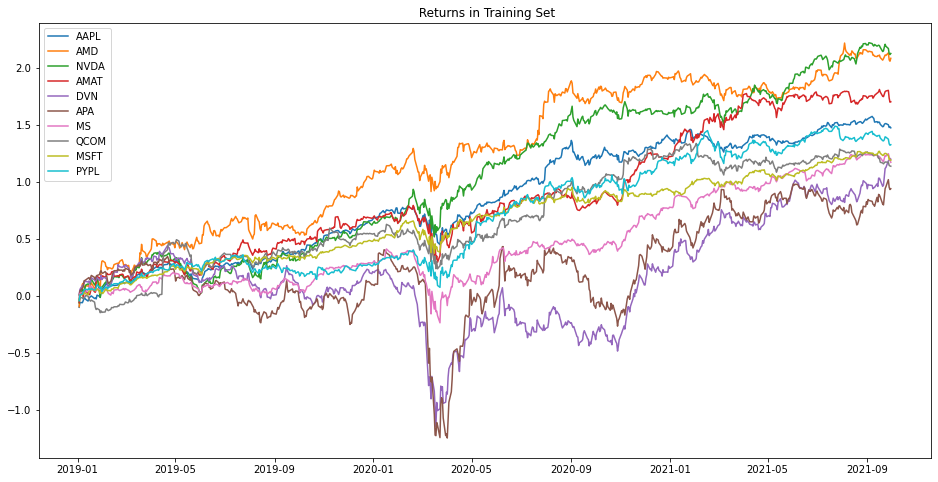

In [185]:
plt.figure(figsize=(16,8))
plt.plot(returns_train['AAPL'].cumsum(),label='AAPL')
plt.plot(returns_train['AMD'].cumsum(),label='AMD')
plt.plot(returns_train['NVDA'].cumsum(),label='NVDA')
plt.plot(returns_train['AMAT'].cumsum(),label='AMAT')
plt.plot(returns_train['DVN'].cumsum(),label='DVN')
plt.plot(returns_train['APA'].cumsum(),label='APA')
plt.plot(returns_train['MS'].cumsum(),label='MS')
plt.plot(returns_train['QCOM'].cumsum(),label='QCOM')
plt.plot(returns_train['MSFT'].cumsum(),label='MSFT')
plt.plot(returns_train['PYPL'].cumsum(),label='PYPL')



plt.title(' Returns in Training Set')
plt.legend()


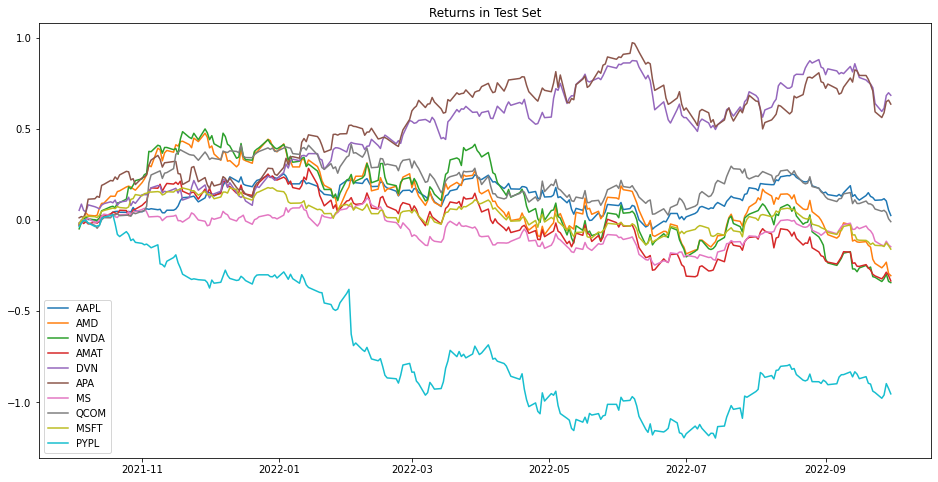

In [184]:
plt.figure(figsize=(16,8))
plt.plot(returns_test['AAPL'].cumsum(),label='AAPL')
plt.plot(returns_test['AMD'].cumsum(),label='AMD')
plt.plot(returns_test['NVDA'].cumsum(),label='NVDA')
plt.plot(returns_test['AMAT'].cumsum(),label='AMAT')
plt.plot(returns_test['DVN'].cumsum(),label='DVN')
plt.plot(returns_test['APA'].cumsum(),label='APA')
plt.plot(returns_test['MS'].cumsum(),label='MS')
plt.plot(returns_test['QCOM'].cumsum(),label='QCOM')
plt.plot(returns_test['MSFT'].cumsum(),label='MSFT')
plt.plot(returns_test['PYPL'].cumsum(),label='PYPL')
plt.title('Returns in Test Set')
plt.legend()


In [10]:
returns_test=df_prices_test.pct_change().dropna()
returns_test

Symbols,AAPL,NVDA,AMAT,DVN,APA,MS,QCOM,MSFT,PYPL,AMD
Date,,,,,,,,,,
2021-10-04,-0.024568,-0.048614,-0.030387,0.052950,0.011896,-0.019184,-0.015817,-0.020695,-0.036425,-0.020595
2021-10-05,0.014071,0.036399,0.022842,0.034057,0.006817,0.021106,0.006684,0.019964,0.020156,0.014650
2021-10-06,0.006336,0.012128,-0.012071,-0.034928,-0.004952,-0.001000,0.004195,0.015054,0.015030,0.017975
2021-10-07,0.009122,0.018121,0.010712,-0.007233,0.031686,-0.003035,-0.001735,0.005924,-0.001969,0.027113
2021-10-08,-0.002730,-0.011579,-0.012949,0.037994,0.068420,0.012555,-0.010091,0.000000,-0.013205,-0.013058
...,...,...,...,...,...,...,...,...,...,...
2022-09-26,0.002260,-0.023011,-0.016016,-0.043508,-0.031336,-0.021470,-0.011965,-0.001975,-0.031160,-0.024426
2022-09-27,0.006566,0.015129,0.014589,0.017941,0.026382,-0.003511,0.005011,-0.004380,0.017683,0.013122
2022-09-28,-0.012652,0.026021,0.021985,0.069076,0.060894,0.025038,-0.011717,0.019712,0.062624,0.017716


In [11]:
mu_train = expected_returns.mean_historical_return(df_prices_train)
mu_train

Symbols
AAPL    0.608192
NVDA    0.934366
AMAT    0.655183
DVN     0.208260
APA    -0.053745
MS      0.415404
QCOM    0.380619
MSFT    0.469520
PYPL    0.498162
AMD     0.856064
dtype: float64

In [12]:
cov_matrix_train = risk_models.sample_cov(df_prices_train)
cov_matrix_train

Symbols,AAPL,NVDA,AMAT,DVN,APA,MS,QCOM,MSFT,PYPL,AMD
Symbols,,,,,,,,,,
AAPL,0.121901,0.113556,0.101089,0.080090,0.084550,0.076008,0.089193,0.084457,0.091251,0.107013
NVDA,0.113556,0.225948,0.155248,0.108592,0.106785,0.094648,0.121604,0.107996,0.127513,0.180054
AMAT,0.101089,0.155248,0.228956,0.144820,0.152462,0.114442,0.134820,0.099778,0.120417,0.146066
DVN,0.080090,0.108592,0.144820,0.482606,0.475711,0.168917,0.106977,0.073603,0.085813,0.096620
APA,0.084550,0.106785,0.152462,0.475711,0.732172,0.183282,0.112510,0.073089,0.099326,0.090965
MS,0.076008,0.094648,0.114442,0.168917,0.183282,0.158803,0.086294,0.070891,0.074681,0.082986
QCOM,0.089193,0.121604,0.134820,0.106977,0.112510,0.086294,0.185726,0.081859,0.092612,0.114311
MSFT,0.084457,0.107996,0.099778,0.073603,0.073089,0.070891,0.081859,0.095816,0.090727,0.097632
PYPL,0.091251,0.127513,0.120417,0.085813,0.099326,0.074681,0.092612,0.090727,0.157124,0.109430


((-1, 1),
 (-1, 1),
 (-1, 1),
 (-1, 1),
 (-1, 1),
 (-1, 1),
 (-1, 1),
 (-1, 1),
 (-1, 1),
 (-1, 1))

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [17]:
from scipy.optimize import minimize

In [84]:
# The constraints
cons = (# The weights must sum up to one.
        {"type":"eq", "fun": lambda x: np.sum(x)-1}, 
        # This constraint says that the inequalities (ineq) must be non-negative.
        # The expected daily return of our portfolio and we want to be at greater than 0.001
        {"type": "ineq", "fun": lambda x: np.sum(returns_train.mean()*x)}) 
# the objective function is to minimize the portfolio risk
def objective(weights): 
    weights = np.array(weights)
    return weights.dot(cov_matrix_train).dot(weights.T)
# Every stock can get any weight from -1 to 1
bounds = tuple((-1,1) for x in range(returns_train.shape[1])) 
guess = [0.1 for x in range(returns_train.shape[1])]
optimized_results = minimize(objective, guess, method = "SLSQP", bounds=bounds, constraints=cons)
optimized_results

     fun: 0.08344179733195195
     jac: array([0.1671298 , 0.1669025 , 0.16690387, 0.1667699 , 0.1667854 ,
       0.16659689, 0.16645367, 0.16697125, 0.16707404, 0.16676096])
 message: 'Optimization terminated successfully'
    nfev: 187
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([ 0.18083168, -0.18910473, -0.12601285,  0.01060402, -0.01864123,
        0.22822299,  0.11002038,  0.6742593 ,  0.09753804,  0.0322824 ])

In [85]:
# we get 1
np.sum(optimized_results.x)

1.0000000000000002

In [86]:
pd.DataFrame(list(zip(tickers, optimized_results.x)), columns=['Symbol', 'Weight'])

,Symbol,Weight
0,AAPL,0.180832
1,NVDA,-0.189105
2,AMAT,-0.126013
3,DVN,0.010604
4,APA,-0.018641
5,MS,0.228223
6,QCOM,0.110020
7,MSFT,0.674259
8,PYPL,0.097538
9,AMD,0.032282


In [87]:
optimized_results.x

array([ 0.18083168, -0.18910473, -0.12601285,  0.01060402, -0.01864123,
        0.22822299,  0.11002038,  0.6742593 ,  0.09753804,  0.0322824 ])

In [88]:
opt_result = np.matmul(np.matrix(returns_train), np.array(optimized_results.x))
train_mean=opt_result.mean()
train_sharpe=opt_result.mean()/opt_result.std()

In [89]:
train_mean

0.001497244548090308

In [90]:
train_sharpe

0.08234082408487556

In [91]:
opt_result_newret = np.matmul(np.matrix(returns_test),np.array(optimized_results.x))
unstrained_sharpe=opt_result_newret.mean()/opt_result_newret.std()
opt_result_newret.mean()

-0.0005506728972510742

In [92]:
unstrained_sharpe

-0.03399663432545509

In [93]:
print(tickers)

['AAPL', 'NVDA', 'AMAT', 'DVN', 'APA', 'MS', 'QCOM', 'MSFT', 'PYPL', 'AMD']


'AAPL':-0.0080
'NVDA':-0.0190
'AMAT':0.0356
'DVN':0.1019
'APA':0.1340
'MS':0.0300
'QCOM':0.0090
'MSFT':0.0065
'PCG':0.2698
'RRC':0.014

In [94]:
-0.007986758893280634, -0.019049019151138716, 0.0356158138238573, 0.10189923913043479, 0.13403416149068323, 0.030030434782608695, 0.008994367588932808, 0.0065207037768994286, 0.26978260869565224, 0.014782608695652176

(-0.007986758893280634,
 -0.019049019151138716,
 0.0356158138238573,
 0.10189923913043479,
 0.13403416149068323,
 0.030030434782608695,
 0.008994367588932808,
 0.0065207037768994286,
 0.26978260869565224,
 0.014782608695652176)

In [95]:
cov_matrix_train

Symbols,AAPL,NVDA,AMAT,DVN,APA,MS,QCOM,MSFT,PYPL,AMD
Symbols,,,,,,,,,,
AAPL,0.121901,0.113556,0.101089,0.080090,0.084550,0.076008,0.089193,0.084457,0.091251,0.107013
NVDA,0.113556,0.225948,0.155248,0.108592,0.106785,0.094648,0.121604,0.107996,0.127513,0.180054
AMAT,0.101089,0.155248,0.228956,0.144820,0.152462,0.114442,0.134820,0.099778,0.120417,0.146066
DVN,0.080090,0.108592,0.144820,0.482606,0.475711,0.168917,0.106977,0.073603,0.085813,0.096620
APA,0.084550,0.106785,0.152462,0.475711,0.732172,0.183282,0.112510,0.073089,0.099326,0.090965
MS,0.076008,0.094648,0.114442,0.168917,0.183282,0.158803,0.086294,0.070891,0.074681,0.082986
QCOM,0.089193,0.121604,0.134820,0.106977,0.112510,0.086294,0.185726,0.081859,0.092612,0.114311
MSFT,0.084457,0.107996,0.099778,0.073603,0.073089,0.070891,0.081859,0.095816,0.090727,0.097632
PYPL,0.091251,0.127513,0.120417,0.085813,0.099326,0.074681,0.092612,0.090727,0.157124,0.109430


In [96]:
#viewdict = {'AAPL':-0.0090,'NVDA':-0.0196,'AMAT':0.0353,'DVN':0.1019,'APA':0.03,'MS':0.1330,'QCOM':0.0095,'MSFT':0.0059,'PYPL':0.0936,'AMD':0.0109 }
viewdict = {'AAPL':0.0112,'NVDA':0.3301,'AMAT':-0.1490,'DVN':-0.2788,'APA':0.3047,'MS':0.5801,'QCOM':-0.1076,'MSFT':0.2366,'PYPL':-0.2367,'AMD':0.0776 }


/Users/rz/opt/anaconda3/lib/python3.9/site-packages/pypfopt/black_litterman.py:257: UserWarning: Running Black-Litterman with no prior.
  warnings.warn("Running Black-Litterman with no prior.")


In [97]:
viewdict = {'AAPL':0.0112,'NVDA':0.3301,'AMAT':-0.1490,'DVN':-0.2788,'APA':0.3047,'MS':0.5801,
            'QCOM':-0.1076,'MSFT':0.2366,'PYPL':-0.2367,'AMD':0.0776 }
bl = BlackLittermanModel(cov_matrix_train, absolute_views=viewdict)
a=bl.bl_weights()
df = pd.DataFrame({'Ticker':a.keys(), 'Weights':a.values()})
df

,Ticker,Weights
0,AAPL,-0.381544
1,NVDA,0.825945
2,AMAT,-0.690233
3,DVN,-0.621157
4,APA,0.221615
5,MS,2.072790
6,QCOM,-0.546922
7,MSFT,1.395214
8,PYPL,-1.267650
9,AMD,-0.008058


In [109]:
#df['Weights'].values

array([-0.38154405,  0.82594471, -0.69023266, -0.62115669,  0.22161465,
        2.07279042, -0.54692193,  1.39521416, -1.26765016, -0.00805846])

In [110]:
weights=np.array([-0.3815,0.8259,-0.6902,-0.6212,0.2216,2.0728,-0.5469,1.3952,-1.2677,-0.0081])
weights.reshape(-1, 1)

array([[-0.3815],
       [ 0.8259],
       [-0.6902],
       [-0.6212],
       [ 0.2216],
       [ 2.0728],
       [-0.5469],
       [ 1.3952],
       [-1.2677],
       [-0.0081]])

In [111]:
weights.shape

(10,)

In [112]:
np.matrix(returns_test).shape

(251, 10)

In [113]:
opt_result_newret = np.matmul(np.matrix(returns_test),weights.reshape(-1, 1))
strained_sharpe=opt_result_newret.mean()/opt_result_newret.std()
opt_result_newret.mean()

0.0013631209931548134

In [114]:
strained_sharpe

0.02892785369029126

In [103]:
import yfinance as yf

In [104]:
start = pd.Timestamp('2019-01-01')
end1 = pd.Timestamp('2021-09-30')
end2=pd.Timestamp('2022-09-30')


spy_train = yf.download(['SPY'],start,end1)['Close']
spy_test=yf.download(['SPY'],end1,end2)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [115]:
#spy_train_ret=spy_train.pct_change().dropna()
spy_test_ret=spy_test.pct_change().dropna()

spy_test_ret

Date
2021-10-01    0.011884
2021-10-04   -0.012896
2021-10-05    0.010405
2021-10-06    0.004156
2021-10-07    0.008646
                ...   
2022-09-23   -0.016755
2022-09-26   -0.009893
2022-09-27   -0.002553
2022-09-28    0.019676
2022-09-29   -0.020889
Name: Close, Length: 251, dtype: float64

In [116]:
spy_test_ret.shape

(251,)

In [117]:
opt_result_newret.shape

(251, 1)

In [118]:
spy=pd.DataFrame(spy_test_ret)
spy

,Close
Date,
2021-10-01,0.011884
2021-10-04,-0.012896
2021-10-05,0.010405
2021-10-06,0.004156
2021-10-07,0.008646
...,...
2022-09-23,-0.016755
2022-09-26,-0.009893
2022-09-27,-0.002553


In [122]:
opt_result_newret.shape

(251, 1)

In [124]:
#portfolio=np.matmul(np.matrix(return_etfs), np.array(optimized_results.x))
port=pd.DataFrame(opt_result_newret.reshape(251,-1),columns=['Portfolio'])
port

,Portfolio
0,-0.053705
1,0.031559
2,0.033969
3,0.020808
4,0.040364
...,...
246,0.010256
247,-0.044029
248,-0.011997
249,-0.018417


In [125]:
data = pd.concat([spy,port], axis=1)
data.columns = ['spy','port']
data 

,spy,port
0,0.011884,-0.053705
1,-0.012896,0.031559
2,0.010405,0.033969
3,0.004156,0.020808
4,0.008646,0.040364
...,...,...
246,-0.016755,0.010256
247,-0.009893,-0.044029
248,-0.002553,-0.011997
249,0.019676,-0.018417


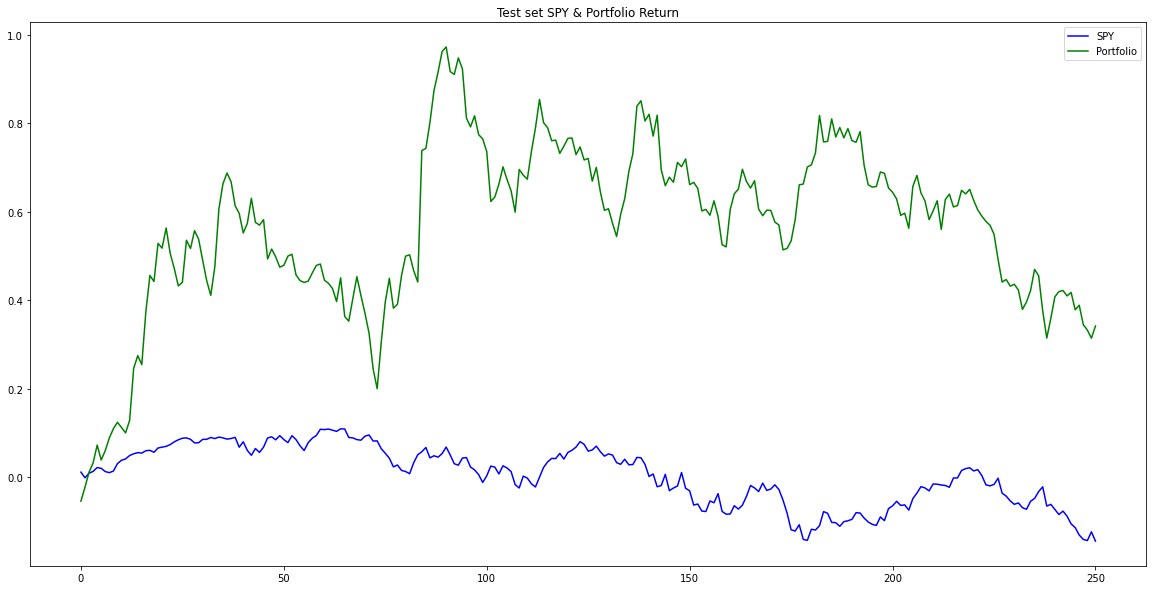

In [127]:
plt.figure(figsize=(20,10))
plt.plot(data['spy'].cumsum(),color='b',label='SPY')
plt.plot(data['port'].cumsum(),color='g',label='Portfolio')
plt.title("Test set SPY & Portfolio Return")
plt.legend()

In [130]:
data['spy'].iloc[0:bf_day].sort_values()[4]

0.008645688246479821

In [131]:
data['spy'].iloc[1:bf_day+1].sort_values()[4]

0.008645688246479821

In [99]:
len(data['spy'])

251

In [167]:
var_10.shape

(10,)

In [168]:
import seaborn as sns

Text(0.5, 0, 'Loss of money')

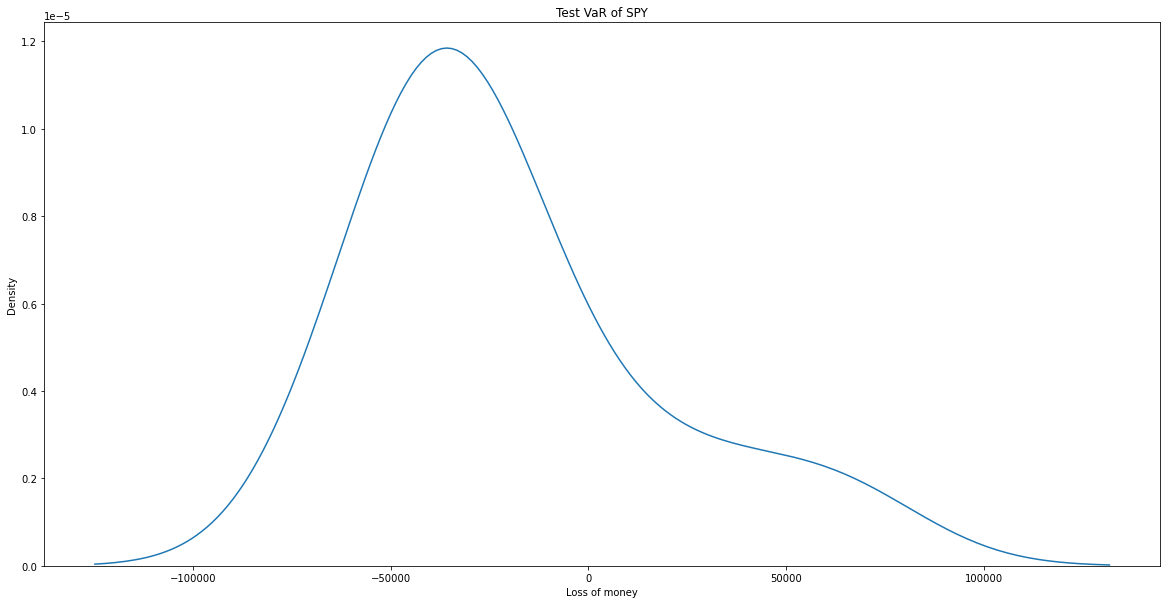

In [172]:
# 10day VaR = sqrt(10)* 1day VaR
roll = 10
a = 0.05
bf_day = 100
seq = int(a*bf_day)
len_day=len(data['spy'])-roll
var_1 = np.zeros(len_day)
var_1.shape
for i in range(len_day):
    td_var_1 = data['spy'].iloc[i:i+10].sort_values()
    var_1 = td_var_1  
    var_10 = var_1*np.sqrt(10)
    
plt.figure(figsize=(20,10))
sns.kdeplot(var_10*1000000)
plt.title("Test VaR of SPY")
plt.xlabel("Loss of money")

Text(0.5, 0, 'Loss of money')

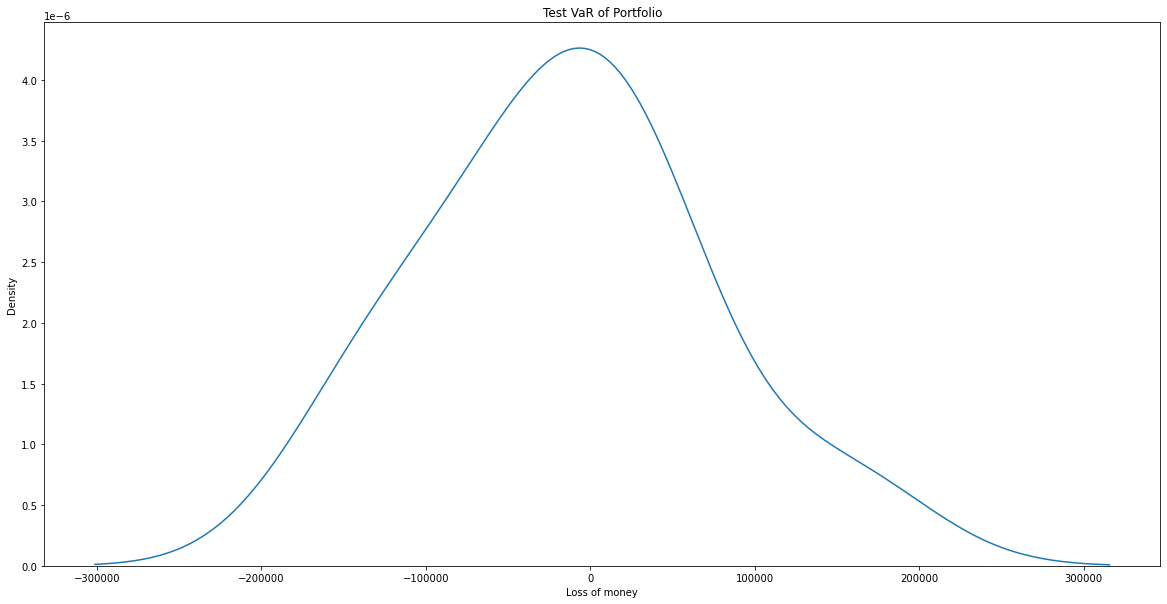

In [171]:
len_day=len(data['port'])-roll
var_1 = np.zeros(len_day)
var_1.shape
for i in range(len_day):
    td_var_1 = data['port'].iloc[i:i+10].sort_values()
    var_1 = td_var_1  
    var_10 = var_1*np.sqrt(10)
    
plt.figure(figsize=(20,10))
sns.kdeplot(var_10*1000000)
plt.title("Test VaR of Portfolio")
plt.xlabel("Loss of money")

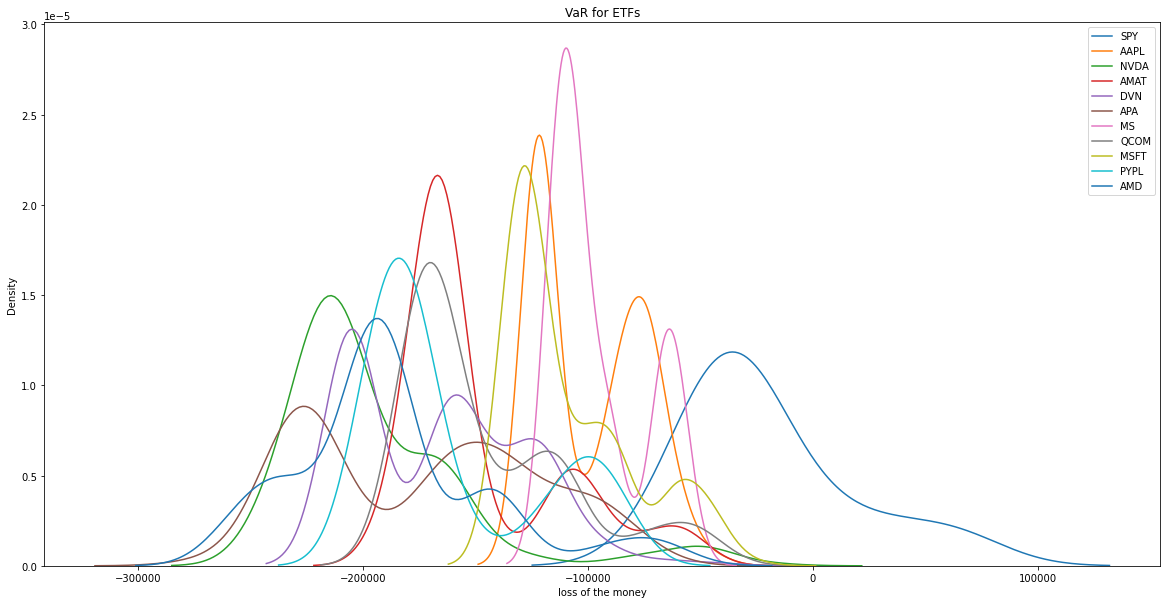

In [175]:
plt.figure(figsize=(20,10))

num_etf = len(returns_test.columns)
var_etf_1 = np.zeros((len_day, num_etf))
for i in range(len_day):
    for j in range(num_etf):
        td_var_one_1 = returns_test.iloc[i:i+bf_day,j].sort_values()[seq-1]
        var_etf_1[i,j] = td_var_one_1
var_etf_10 = var_etf_1*np.sqrt(10)
sns.kdeplot(var_10*1000000, label='SPY')
for i in range(num_etf):
    sns.kdeplot(var_etf_10[:,i]*1000000, label=returns_test.columns[i])
plt.title('VaR for ETFs')
plt.xlabel("loss of the money")
plt.legend()